In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
GastricResults = pd.read_csv("total_GastricCancer_results_SVM.csv")

In [3]:
GastricResults

,Patient to be predicted/left out,Poor Survival Subpopulation,Moderate Survival Subpopulation,Good Survival Subpopulation,Predicted Survivability,Surv(months),Survival Status,Number of Clusters,SAM Features for each tSNE run on new subset
0,1,0.00,100.00,0.00,High,34.23,0,8,"Significant Features : m/z = [3445, 3374, 3482..."
1,2,0.00,100.00,0.00,High,0.67,1,7,"Significant Features : m/z = [3409, 3482, 3711..."
2,3,4.30,9.39,86.31,High,0.43,0,6,"Significant Features : m/z = [3409, 3374, 3445..."
3,4,29.78,46.67,23.56,Moderate,45.00,0,4,"Significant Features : m/z = [3374, 3445, 3409..."
4,5,0.19,99.81,0.00,High,33.53,1,8,"Significant Features : m/z = [3409, 3374, 3482..."
...,...,...,...,...,...,...,...,...,...
58,59,33.65,66.35,0.00,Moderate,20.77,1,8,"Significant Features : m/z = [3409, 3374, 3445..."
59,60,54.12,27.06,18.82,Poor,0.30,1,4,"Significant Features : m/z = [3374, 3445, 3409..."
60,61,1.87,45.02,53.11,High,2.67,1,8,"Significant Features : m/z = [3409, 3374, 3482..."
61,62,49.26,16.12,34.62,Moderate,0.47,1,4,"Significant Features : m/z = [3374, 3445, 3409..."


In [4]:
Significant_Proteins = GastricResults["SAM Features for each tSNE run on new subset"].to_numpy()

In [5]:
Significant_proteins_values_list = [ ]
for i in range(len(Significant_Proteins)):
    Significant_proteins_values = Significant_Proteins[i].split('=')[1].split('[')[1].split(']')[0].split(',')
    Significant_proteins_values = [int(i) for i in Significant_proteins_values]
    Significant_proteins_values_list.append(Significant_proteins_values)

In [6]:
from functools import reduce
flattened_Significant_proteins_values = reduce(lambda x, y: x+y, Significant_proteins_values_list)
unique_values, counts = np.unique(flattened_Significant_proteins_values,return_counts=True)

count_sort_ind = np.argsort(-counts)
unique_values = unique_values[count_sort_ind]
counts = counts[count_sort_ind]

In [7]:
counts

array([63, 63, 62, 53, 46, 46, 44, 29, 24, 22,  1,  1,  1,  1,  1,  1,  1,
        1], dtype=int64)

In [8]:
selected_unique_values = unique_values[0::]
selected_counts = counts[0::]

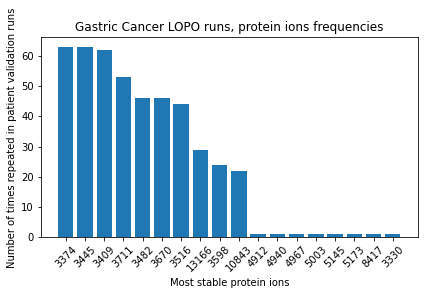

In [9]:
fig = plt.figure()
plt.xticks(rotation=45)
plt.bar(range(len(selected_counts)),selected_counts,tick_label = selected_unique_values)
plt.title("Gastric Cancer LOPO runs, protein ions frequencies")
plt.ylabel("Number of times repeated in patient validation runs")
plt.xlabel("Most stable protein ions")
plt.tight_layout()

In [10]:
above_80per_idx = [ ]
for i in range(len(counts)):
    if counts[i] >= int(63*0.8):
        above_80per_idx.append(i)

print("Most stable protein ions:" , unique_values[above_80per_idx])
print("Frequency of protein ions apperance:" , counts[above_80per_idx])

Most stable protein ions: [3374 3445 3409 3711]
Frequency of protein ions apperance: [63 63 62 53]


In [11]:
predictions_poor = [ ]
poor_status_idx = [ ]
for i in range(len(GastricResults)):
    if (GastricResults["Predicted Survivability"][i] == "Poor" or
    GastricResults["Predicted Survivability"][i] == "Moderate" or
    GastricResults["Moderate Survival Subpopulation"][i] >= 90) and GastricResults["Survival Status"][i] == 1:
        predictions_poor.append(1)
    else:
        predictions_poor.append(0)
    
    if GastricResults["Survival Status"][i] == 1:
        poor_status_idx.append(i)

In [12]:
predictions_high = [ ]
high_status_idx = [ ]
for i in range(len(GastricResults)):
    if GastricResults["Predicted Survivability"][i] == "High" and GastricResults["Survival Status"][i] == 0:
        predictions_high.append(1)
    else:
        predictions_high.append(0)
    
    if GastricResults["Survival Status"][i] == 0:
        high_status_idx.append(i)

In [13]:
poor_classifications = np.unique(predictions_poor,return_counts=True)
high_classifications = np.unique(predictions_high,return_counts=True)

In [14]:
poor_accuracy = round(( poor_classifications[1][1] / len(poor_status_idx) )* 100,2)
print("Poor Survivability Classification approximate accuracy: ", poor_accuracy)

Poor Survivability Classification approximate accuracy:  65.22


In [15]:
high_accuracy = round(( high_classifications[1][1] / len(high_status_idx) )* 100,2)
print("High Survivability Classification approximate accuracy: ", high_accuracy)

High Survivability Classification approximate accuracy:  72.5


In [16]:
overall_accuracy = round (( (poor_classifications[1][1] + high_classifications[1][1]) / len(GastricResults) ) * 100 , 2)
print("Overall Classification approximate accuracy: ", overall_accuracy)

Overall Classification approximate accuracy:  69.84
